# Data preprocessing and analysis on American universities dataset

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#Load datasets region.csv
df_reg = pd.read_csv('region.csv')
df_reg.head()

,state,region
0,Alabama,South
1,Alaska,West
2,Arizona,Southwest
3,Arkansas,South
4,California,West


In [3]:
#Checking chape
df_reg.shape

(51, 2)

In [4]:
#Checking information on datasets
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   state   51 non-null     object
 1   region  51 non-null     object
dtypes: object(2)
memory usage: 948.0+ bytes


In [5]:
#Handling with null values
df_reg.isnull().sum()

state     0
region    0
dtype: int64

In [6]:
#Handling duplicate values
df_reg.duplicated().sum()

0

In [7]:
#Checking count of unique values
df_reg.nunique()

state     51
region     6
dtype: int64

South             12
Midwest           12
West              11
New England        6
Mid – Atlantic     6
Southwest          4
Name: region, dtype: int64


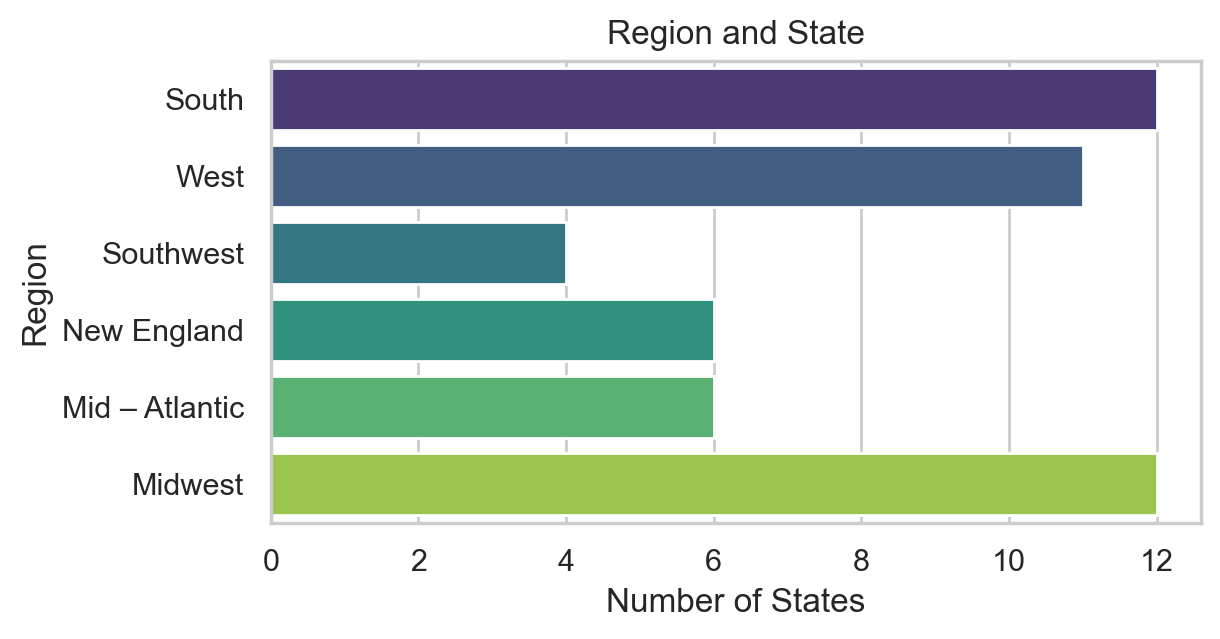

In [8]:
# Print region-wise state counts
print(df_reg.region.value_counts())

# Set up Seaborn count plot
plt.figure(figsize=(6, 3), dpi=200)
sns.countplot(y='region', data=df_reg, palette='viridis')

# Add title and labels
plt.title("Region and State")
plt.xlabel('Number of States')
plt.ylabel("Region")

# Show the plot
plt.show()

In [9]:
#Loading state gdp datasets
df_st = pd.read_csv('states_gdp.csv')
df_st.head()

,code,state,gdp_million
0,1000,Alabama,191481.0
1,2000,Alaska,56622.8
2,4000,Arizona,275199.1
3,5000,Arkansas,114251.5
4,6000,California,2262771.2


In [10]:
#Checking shape
df_st.shape

(51, 3)

In [11]:
#Checking information on datasets
df_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   code         51 non-null     int64  
 1   state        51 non-null     object 
 2   gdp_million  51 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ KB


In [12]:
#Handling with null data
df_st.isnull().sum()

code           0
state          0
gdp_million    0
dtype: int64

In [13]:
#Handling with duplicate data
df_st.duplicated().sum()

0

In [14]:
#Checking unique values
df_st.nunique()

code           51
state          51
gdp_million    51
dtype: int64

In [15]:
#Describing on numerical varible
df_st.describe()

,code,gdp_million
count,51.000000,5.100000e+01
mean,28960.784314,3.268928e+05
std,15832.827649,4.088304e+05
min,1000.000000,2.909880e+04
25%,16500.000000,8.209975e+04
50%,29000.000000,1.830149e+05
75%,41500.000000,4.260313e+05
max,56000.000000,2.262771e+06


In [16]:
# Find the index (row) where maximum and minimum GDP values occur
idx_mx_gdp = df_st['gdp_million'].idxmax()
idx_mn_gdp = df_st['gdp_million'].idxmin()

# Get the corresponding state names
st_mx_gdp = df_st.loc[idx_mx_gdp, 'state']
st_mn_gdp = df_st.loc[idx_mn_gdp, 'state']

# Find the maximum and minimum GDP values
mx_gdp = df_st.loc[idx_mx_gdp, 'gdp_million']
mn_gdp = df_st.loc[idx_mn_gdp, 'gdp_million']

# Print the results with comments
print(f'State with Maximum GDP: {st_mx_gdp}, GDP: {mx_gdp} million')
print(f'State with Minimum GDP: {st_mn_gdp}, GDP: {mn_gdp} million')

State with Maximum GDP: California, GDP: 2262771.2 million
State with Minimum GDP: Vermont, GDP: 29098.8 million


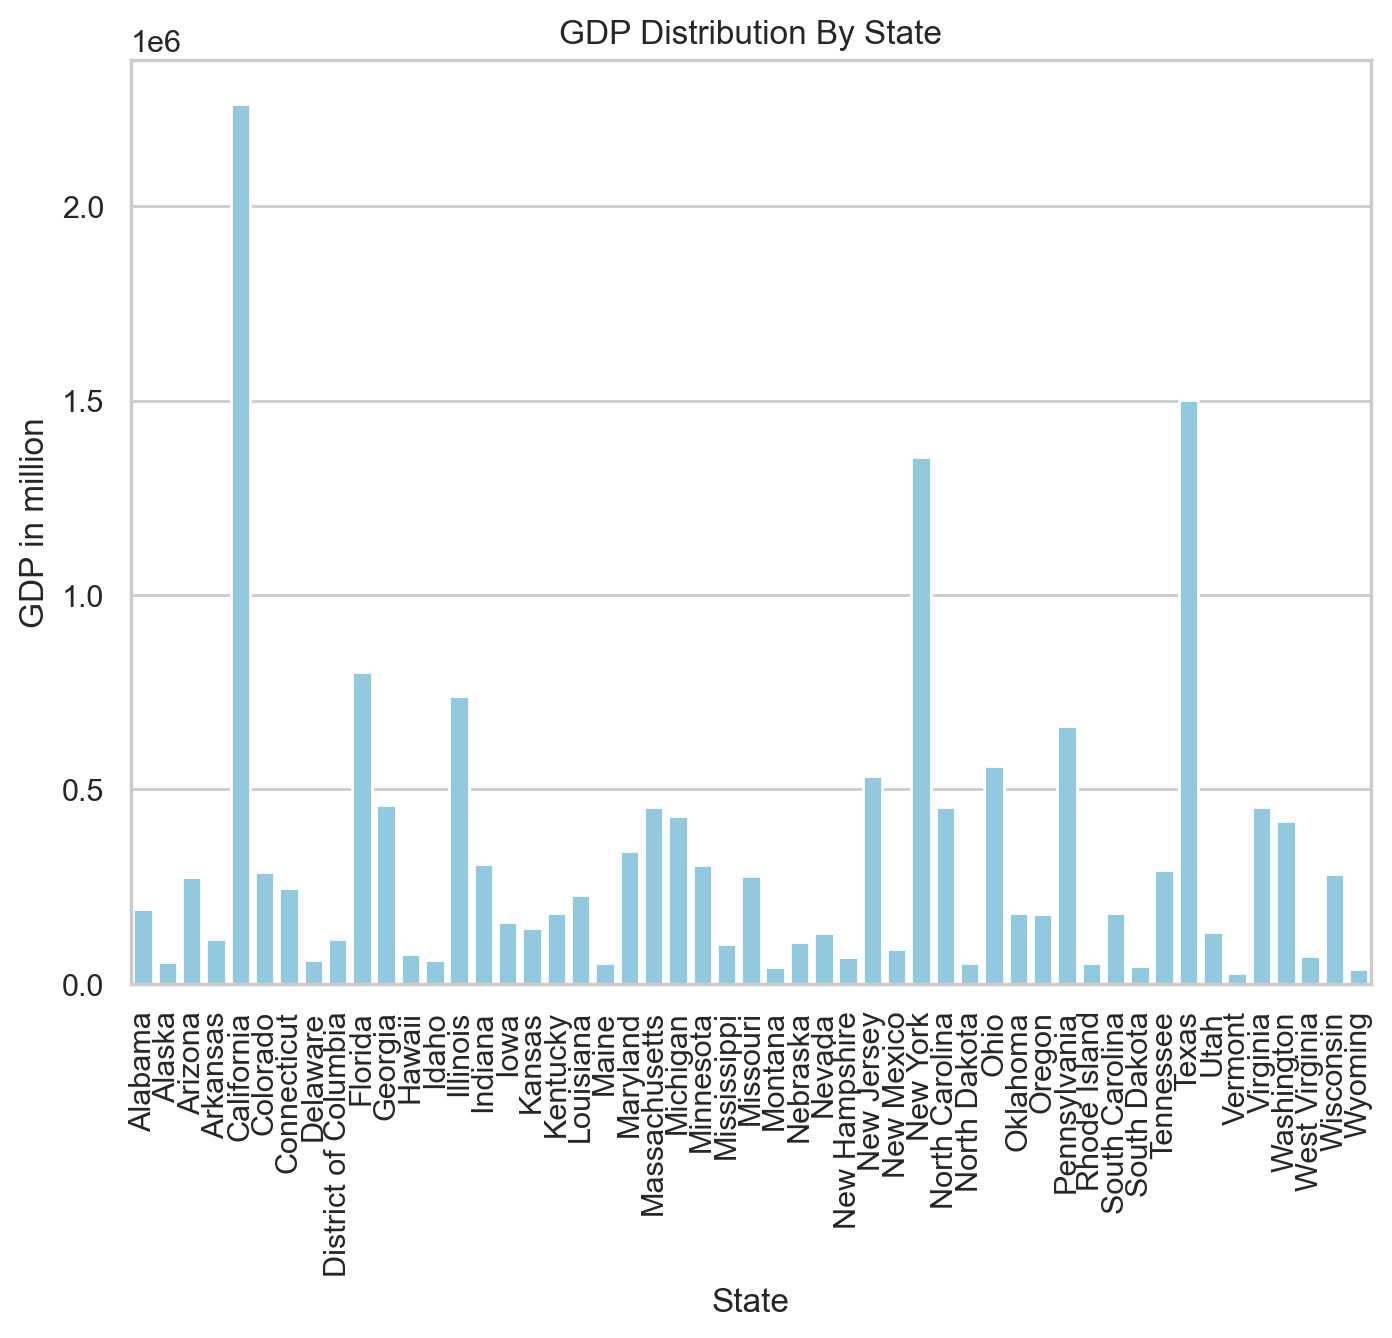

In [17]:
# Create a bar plot with Seaborn on GDP distribution
plt.figure(figsize=(8,6), dpi=200)
sns.barplot(x=df_st['state'], y=df_st['gdp_million'], color='skyblue')
plt.xticks(rotation=90)
plt.title("GDP Distribution By State")
plt.xlabel("State")
plt.ylabel("GDP in million")
plt.show()

In [18]:
#Loading universities_data.csv datasets
df_ust = pd.read_csv('universities_data.csv')
df_ust.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,"-865,685","3,478,337",Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,"-868,092","3,350,223",Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,"-86,174","3,236,261",Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,"-866,384","3,472,282",Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,"-862,957","3,236,432",Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [19]:
df_ust.shape

(1534, 145)

In [20]:
ra = df_ust['Religious affiliation'].value_counts().head(10)
column = ['Counts']
df_ra = ra.to_frame(name = 'Counts').rename_axis('Religious affiliation')
df_ra

,Counts
Religious affiliation,
Not applicable,947
Roman Catholic,178
United Methodist,80
Presbyterian Church (USA),48
Baptist,39
Evangelical Lutheran Church,23
Southern Baptist,18
Churches of Christ,13
Christian Church (Disciples of Christ),13


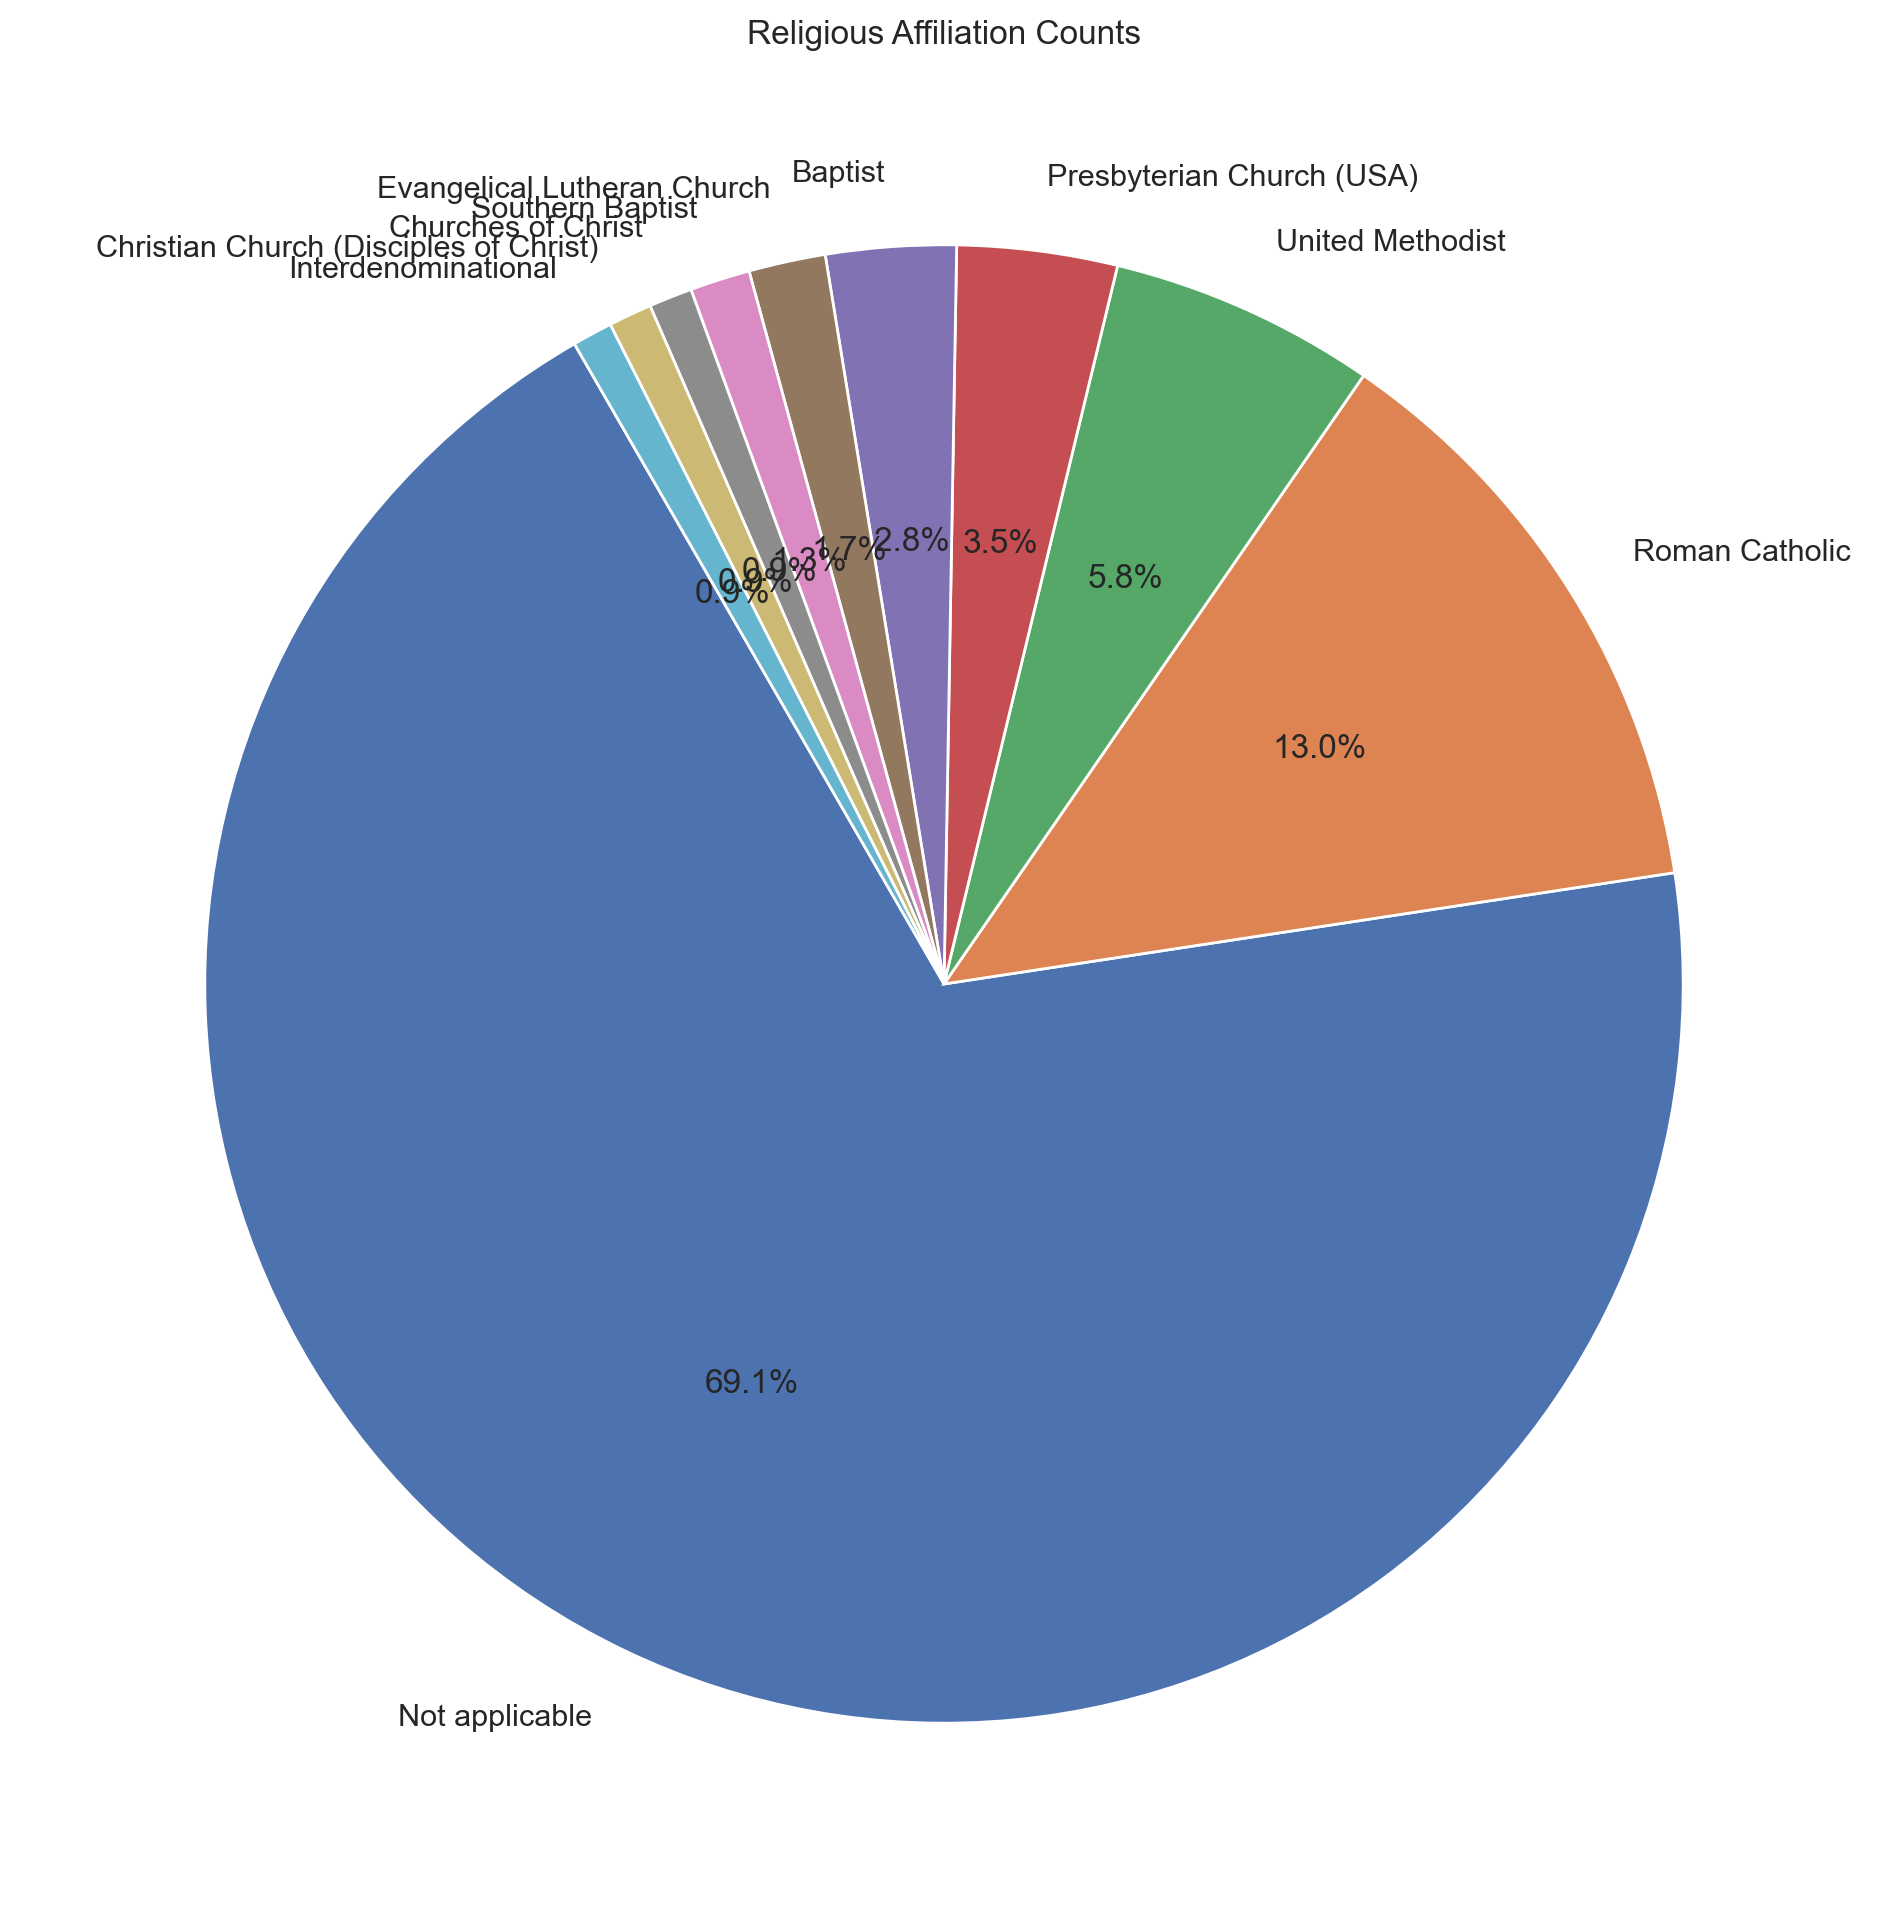

In [21]:
plt.figure(figsize=(12,12), dpi=200)
plt.pie(df_ra['Counts'], labels = df_ra.index, autopct = '%.1f%%',startangle=120)
plt.title('Religious Affiliation Counts')
plt.show()

In [22]:
df_ra.columns

Index(['Counts'], dtype='object')

In [23]:
pd.DataFrame(df_ust.isnull().sum().sort_values(ascending=False)).head(12)

,0
Endowment assets (year end) per FTE enrollment (GASB),1018
SAT Writing 25th percentile score,820
SAT Writing 75th percentile score,820
Number of first-time undergraduates - foreign countries,623
Percent of first-time undergraduates - out-of-state,623
Number of first-time undergraduates - out-of-state,623
Percent of first-time undergraduates - in-state,623
Number of first-time undergraduates - in-state,623
Number of first-time undergraduates - residence unknown,623
Percent of first-time undergraduates - residence unknown,623


In [24]:
# Identify columns with null values greater than 500
col_rem = df_ust.columns[df_ust.isnull().sum()>500]
col_rem

Index(['SAT Writing 25th percentile score',
       'SAT Writing 75th percentile score',
       'Number of first-time undergraduates - in-state',
       'Percent of first-time undergraduates - in-state',
       'Number of first-time undergraduates - out-of-state',
       'Percent of first-time undergraduates - out-of-state',
       'Number of first-time undergraduates - foreign countries',
       'Percent of first-time undergraduates - foreign countries',
       'Number of first-time undergraduates - residence unknown',
       'Percent of first-time undergraduates - residence unknown',
       'Endowment assets (year end) per FTE enrollment (GASB)',
       'Endowment assets (year end) per FTE enrollment (FASB)'],
      dtype='object')

In [25]:
# Remove columns with null values greater than 500
df_ust.drop(columns=col_rem, inplace=True)
df_ust.shape

(1534, 133)

In [26]:
# Identify columns with null values
col_null = df_ust.columns[df_ust.isnull().any()]

# Fill null values with mode in each column
for col in col_null:
    mod_val = df_ust[col].mode()[0]
    df_ust[col].fillna(mod_val, inplace=True)

In [27]:
#Checking with null
pd.DataFrame(df_ust.isnull().sum().sort_values(ascending=False))

,0
ID number,0
Graduate enrollment,0
Percent of undergraduate enrollment that are American Indian or Alaska Native,0
Percent of total enrollment that are women,0
Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,0
...,...
"Estimated freshman enrollment, full time",0
"Estimated freshman undergraduate enrollment, total",0
"Estimated undergraduate enrollment, part time",0
"Estimated undergraduate enrollment, full time",0


In [51]:
df_ust[['Name','Applicants total', 'Admissions total', 'Enrolled total']]

,Name,Applicants total,Admissions total,Enrolled total
0,Alabama A & M University,6142.0,5521.0,1104.0
1,University of Alabama at Birmingham,5689.0,4934.0,1773.0
2,Amridge University,1689.0,521.0,238.0
3,University of Alabama in Huntsville,2054.0,1656.0,651.0
4,Alabama State University,10245.0,5251.0,1479.0
...,...,...,...,...
1529,University of South Florida-Sarasota-Manatee,393.0,136.0,86.0
1530,The Kingâ€™s College,3033.0,2158.0,127.0
1531,Ottawa University-Online,1689.0,521.0,238.0
1532,Providence Christian College,122.0,65.0,20.0


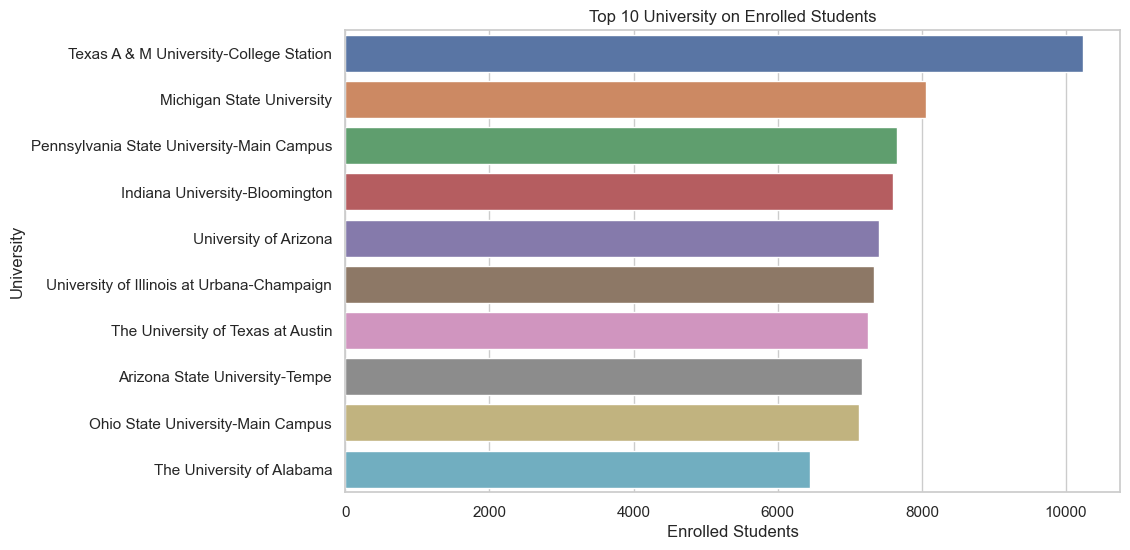

In [66]:
ust_en = df_ust[['Name','Enrolled total']]
ust_en = ust_en.sort_values(by='Enrolled total', ascending=False).head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x='Enrolled total', y='Name', data=ust_en)
plt.title('Top 10 University on Enrolled Students')
plt.xlabel('Enrolled Students')
plt.ylabel('University')
plt.show()

Text(0, 0.5, 'Number of Enrollment')

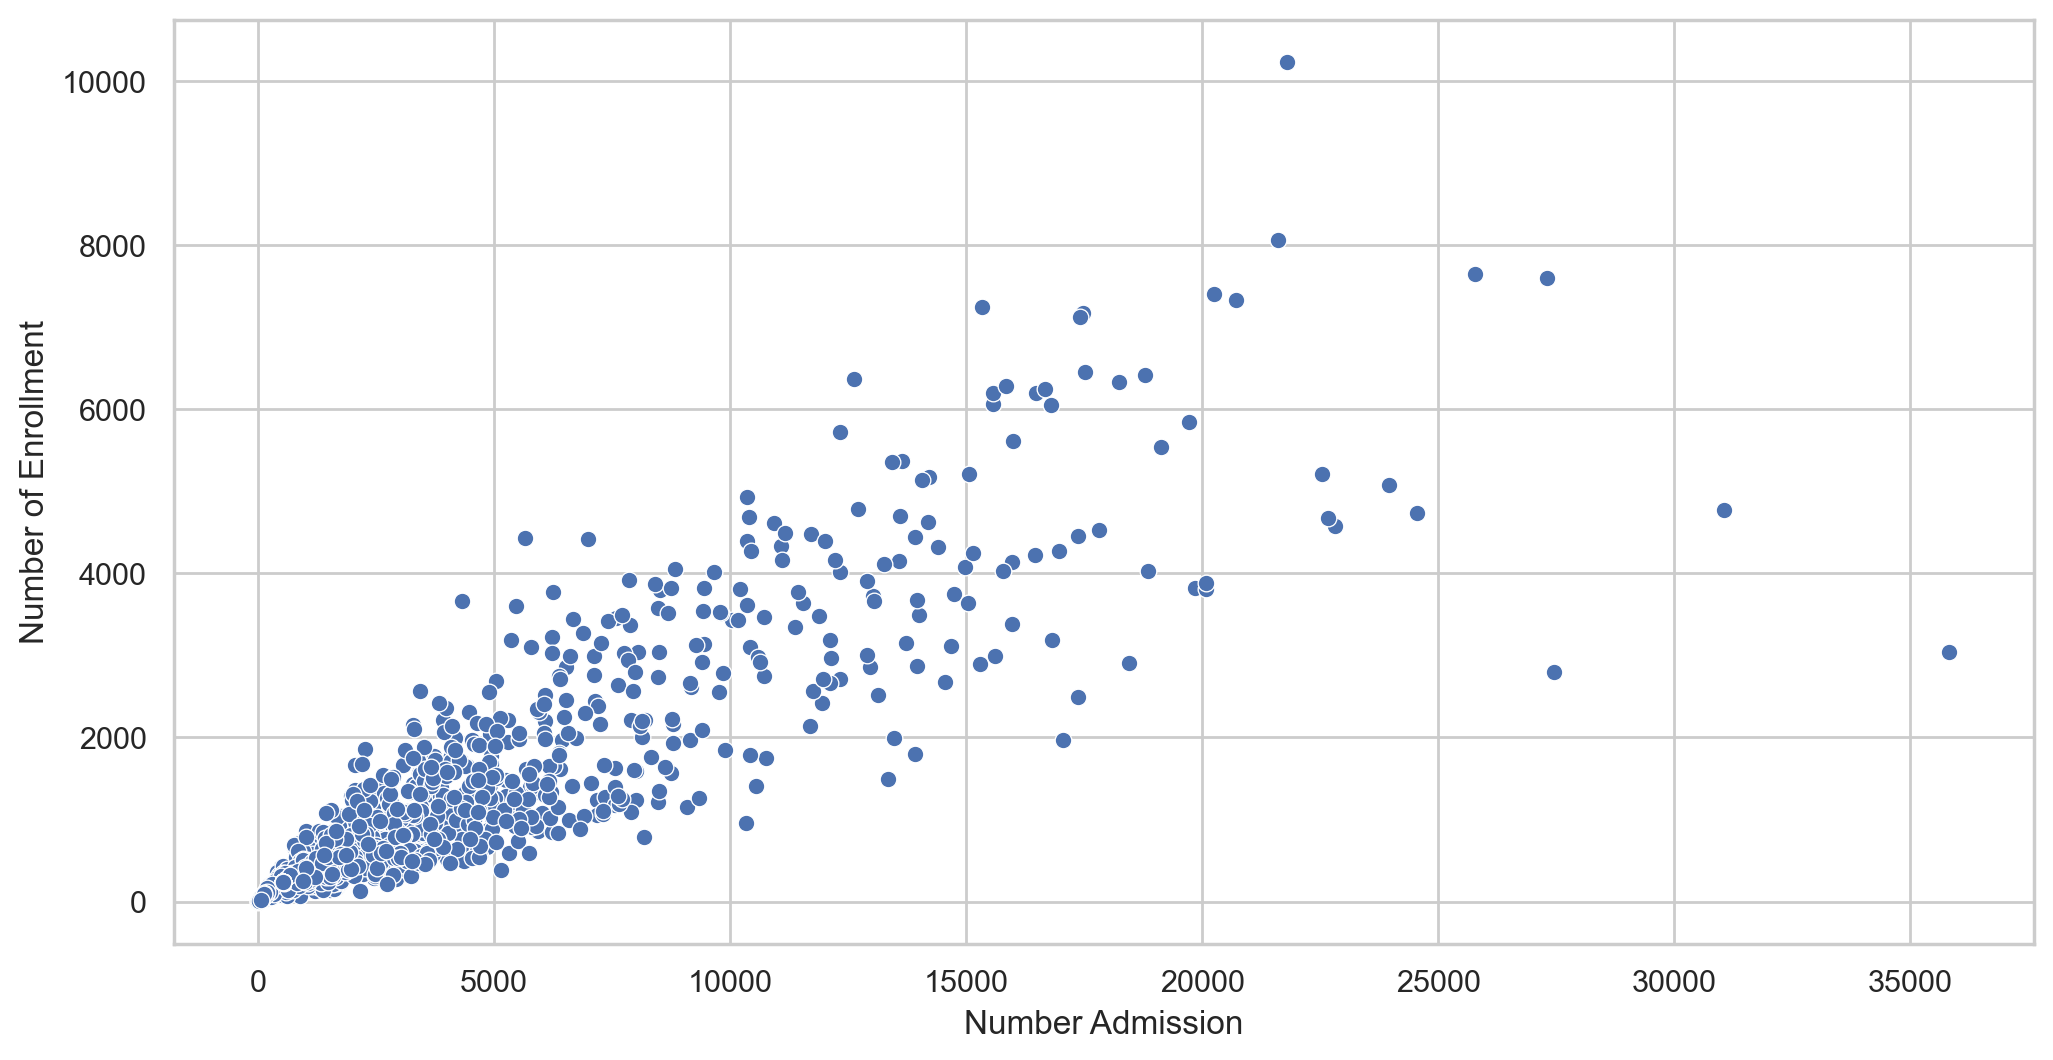

In [68]:
Q2 = df_ust[['Name','Applicants total', 'Admissions total', 'Enrolled total']]

plt.figure(figsize=(12,6), dpi=200)
sns.scatterplot(x='Admissions total', y='Enrolled total', data=Q2)
plt.xlabel('Number Admission')
plt.ylabel('Number of Enrollment')

Text(0, 0.5, 'Number of Enrollment')

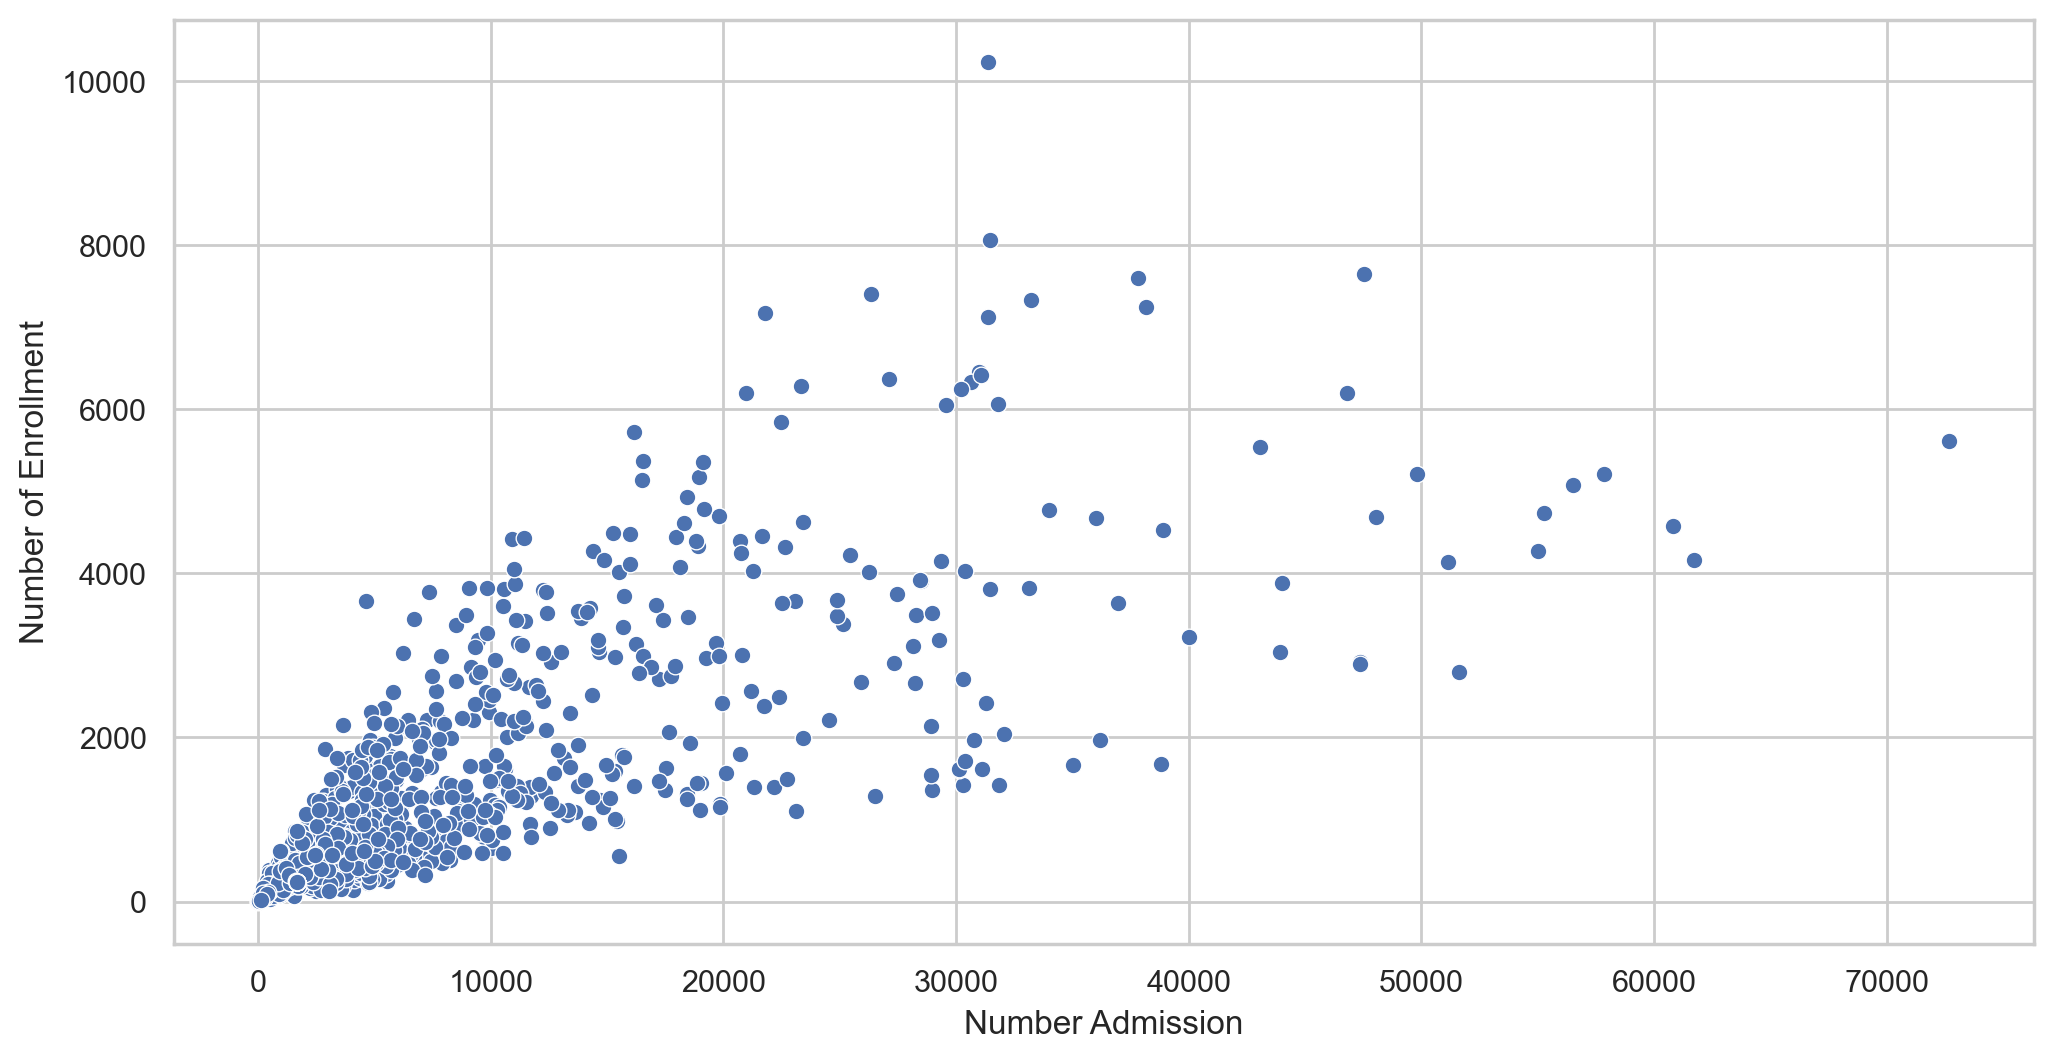

In [69]:
plt.figure(figsize=(12,6), dpi=200)
sns.scatterplot(x='Applicants total', y='Enrolled total', data=Q2)
plt.xlabel('Number Admission')
plt.ylabel('Number of Enrollment')

In [ ]:
Q2['Enrollment_rate'] = Q2['Applicants total']/Q2[]